# Introduction

**Problem:** We are investors in P2P platforms. There are loans that get charged off in the end. If a loan get charged off or defaulted, we will lost our money. We want to prevent that, and minimize our loss.

**Business Metrics:** Loss, net profit margin.

**Solution explanation:** We will create a machine learning model that can identify if a loan is potentially bad / risky loan. It can be used as an investment decision tools. For the model, we're gonna use some non-parametrical algorithm (with little assumption) because we are not statistician, and statistics is hard. If our model is reliable, our investment in risky loans will decrease, our loss can be minimized and our net profit margin should increase.

**Data:** Lending club credit loan data between 2007 - 2014

# Import and Load Dataset

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # cool graph
import matplotlib.pyplot as plt # graph

from datetime import datetime as dt
from collections import defaultdict
import time
from warnings import filterwarnings
filterwarnings('ignore')

df = pd.read_csv('loan_data_2007_2014.csv', sep=',')
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
16140,16140,738208,935546,13000,13000,12750.0,36 months,9.63,417.22,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11027,11027,822246,1030671,20000,20000,19950.0,36 months,14.79,691.26,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14178,14178,770031,971602,1200,1200,1200.0,36 months,5.99,36.51,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7796,7796,875556,1090114,7000,7000,7000.0,36 months,8.49,220.95,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7528,7528,881029,1096068,1500,1500,1500.0,36 months,13.49,50.90,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18264 entries, 0 to 18263
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   18264 non-null  int64  
 1   id                           18264 non-null  int64  
 2   member_id                    18264 non-null  int64  
 3   loan_amnt                    18264 non-null  int64  
 4   funded_amnt                  18264 non-null  int64  
 5   funded_amnt_inv              18264 non-null  float64
 6   term                         18263 non-null  object 
 7   int_rate                     18263 non-null  float64
 8   installment                  18263 non-null  float64
 9   grade                        18263 non-null  object 
 10  sub_grade                    18263 non-null  object 
 11  emp_title                    17076 non-null  object 
 12  emp_length                   17632 non-null  object 
 13  home_ownership  

In [6]:
df.shape

(18264, 75)

# Statistical Summary

In [8]:
numerical = df.select_dtypes(exclude='object')
categorical = df.select_dtypes(include='object')

In [9]:
numerical.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,18264.000000,1.826400e+04,1.826400e+04,18264.000000,18264.000000,18264.000000,18263.000000,18263.000000,1.826300e+04,18263.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9131.500000,8.751911e+05,1.087290e+06,12219.906647,11985.790353,11840.673709,12.353561,342.029763,6.964640e+04,13.893108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5272.506994,1.169725e+05,1.299854e+05,8367.372585,8057.338640,7929.074032,4.172481,220.721466,4.724947e+04,6.716615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.967370e+05,2.967340e+05,1000.000000,1000.000000,400.000000,5.420000,21.740000,6.000000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4565.750000,7.753318e+05,9.769638e+05,6000.000000,6000.000000,5750.000000,8.900000,175.770000,4.200000e+04,8.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9131.500000,8.520165e+05,1.063256e+06,10000.000000,10000.000000,10000.000000,11.990000,301.600000,6.000000e+04,13.970000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13697.250000,9.968520e+05,1.221109e+06,16000.000000,16000.000000,15800.000000,15.280000,456.540000,8.400000e+04,19.140000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,18263.000000,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,1.782000e+06,29.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
categorical.describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,18263,18263,18263,17076,17632,18263,18263,18263,18263,18263,...,18263,18263,18263,18263,18263,18263,18228,1786,18263,18263
unique,2,7,35,14329,11,4,3,10,7,1,...,13,7507,759,45,501,1,58,2,58,1
top,36 months,B,B3,US Army,10+ years,MORTGAGE,Verified,Dec-11,Fully Paid,n,...,debt_consolidation,Debt Consolidation Loan,112xx,CA,Nov-98,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,11886,5578,1550,64,4600,8592,6589,2267,13730,18263,...,8949,1387,243,3225,179,18263,1259,1457,7046,18263


In [11]:
cols_to_drop = [
    'Unnamed: 0',
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'
]

In [12]:
df = df.drop(cols_to_drop, axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18264 entries, 0 to 18263
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    18264 non-null  int64  
 1   funded_amnt                  18264 non-null  int64  
 2   funded_amnt_inv              18264 non-null  float64
 3   term                         18263 non-null  object 
 4   int_rate                     18263 non-null  float64
 5   installment                  18263 non-null  float64
 6   grade                        18263 non-null  object 
 7   emp_title                    17076 non-null  object 
 8   emp_length                   17632 non-null  object 
 9   home_ownership               18263 non-null  object 
 10  annual_inc                   18263 non-null  float64
 11  verification_status          18263 non-null  object 
 12  issue_d                      18263 non-null  object 
 13  loan_status     

# Target and Labeling

In [14]:
df.loan_status.value_counts(normalize=True)*100

Fully Paid            75.179324
Charged Off           15.041340
Current                9.374144
Late (31-120 days)     0.235449
In Grace Period        0.076658
Late (16-30 days)      0.060231
Default                0.032853
Name: loan_status, dtype: float64

In [15]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

df['bad_credit'] = np.where(df['loan_status'].isin(bad_status), 1, 0)

In [17]:
df['bad_credit'].value_counts(normalize=True)*100

0    84.691196
1    15.308804
Name: bad_credit, dtype: float64

In [18]:
df.drop('loan_status', axis=1, inplace=True)

# Preprocessing

## Feature Engineering

### emp_length

In [19]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [20]:
df['emp_length'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')

In [21]:
df['emp_length'] = df['emp_length'].astype(float)

In [22]:
df['emp_length'].describe()

count    17632.000000
mean         5.353051
std          3.537921
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64

### term

In [23]:
df['term'].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [24]:
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype(float)

In [25]:
df['term'].describe()

count    18263.000000
mean        44.380222
std         11.441345
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

### earliest_cr_line

In [26]:
df['earliest_cr_line'].head(5)

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [27]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [28]:
df['mths_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df['mths_earliest_cr_line'].head(3)

0    396.0
1    225.0
2    194.0
Name: mths_earliest_cr_line, dtype: float64

In [29]:
df['mths_earliest_cr_line'].describe()

count    18263.000000
mean       245.225976
std         91.251327
min       -608.000000
25%        193.000000
50%        231.000000
75%        287.000000
max        587.000000
Name: mths_earliest_cr_line, dtype: float64

In [30]:
df[df['mths_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_earliest_cr_line
1580,Sep-62,2062-09-01,-536.0
1770,Sep-68,2068-09-01,-608.0
2799,Sep-64,2064-09-01,-560.0


In [31]:
df.loc[df['mths_earliest_cr_line']<0, 'mths_earliest_cr_line'] = df['mths_earliest_cr_line'].max()

In [32]:
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

In [33]:
df['mths_earliest_cr_line'].describe()

count    18263.000000
mean       248.244812
std         83.102191
min        110.000000
25%        193.000000
50%        232.000000
75%        288.000000
max        587.000000
Name: mths_earliest_cr_line, dtype: float64

### issue_d

In [34]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['mths_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['issue_d_date']) / np.timedelta64(1, 'M')))

In [35]:
df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [36]:
df['mths_issue_d'].describe()

count    18263.000000
mean        76.900509
std          2.698542
min         73.000000
25%         75.000000
50%         77.000000
75%         79.000000
max         82.000000
Name: mths_issue_d, dtype: float64

### last_pymnt_d

In [37]:
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['mths_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [38]:
df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

In [39]:
df['mths_last_pymnt_d'].describe()

count    18228.000000
mean        47.862903
std         14.068561
min         24.000000
25%         39.000000
50%         45.000000
75%         59.000000
max         81.000000
Name: mths_last_pymnt_d, dtype: float64

### next_pymnt_d

In [40]:
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['mths_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [41]:
df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [42]:
df['mths_next_pymnt_d'].describe()

count    1786.000000
mean       23.184211
std         0.387764
min        23.000000
25%        23.000000
50%        23.000000
75%        23.000000
max        24.000000
Name: mths_next_pymnt_d, dtype: float64

### last_credit_pull_d

In [43]:
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['mths_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [44]:
df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

In [45]:
df['mths_last_credit_pull_d'].describe()

count    18263.000000
mean        36.547829
std         14.257934
min         24.000000
25%         24.000000
50%         32.000000
75%         45.000000
max         81.000000
Name: mths_last_credit_pull_d, dtype: float64

## Handling Missing Values

### Check

In [46]:
# print the name of columns with missing values (so I can copy paste :D)
missing = df.isnull().sum() * 100 / df.shape[0]
missing[missing > 0].sort_values(ascending=False)

tot_cur_bal                    100.000000
total_rev_hi_lim               100.000000
mths_since_last_major_derog    100.000000
tot_coll_amt                   100.000000
mths_since_last_record          94.820412
mths_next_pymnt_d               90.221200
mths_since_last_delinq          66.179369
emp_title                        6.504599
emp_length                       3.460359
mths_last_pymnt_d                0.197109
revol_util                       0.054753
total_rec_prncp                  0.005475
total_rec_int                    0.005475
last_pymnt_amnt                  0.005475
total_rec_late_fee               0.005475
recoveries                       0.005475
collection_recovery_fee          0.005475
term                             0.005475
policy_code                      0.005475
collections_12_mths_ex_med       0.005475
total_pymnt                      0.005475
application_type                 0.005475
acc_now_delinq                   0.005475
mths_earliest_cr_line            0

In [47]:
df.drop(['mths_since_last_record', 'mths_since_last_major_derog'], axis=1, inplace=True)

In [48]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              1
int_rate                          1
installment                       1
grade                             1
emp_title                      1188
emp_length                      632
home_ownership                    1
annual_inc                        1
verification_status               1
pymnt_plan                        1
purpose                           1
title                             1
addr_state                        1
dti                               1
delinq_2yrs                       1
inq_last_6mths                    1
mths_since_last_delinq        12087
open_acc                          1
pub_rec                           1
revol_bal                         1
revol_util                       10
total_acc                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv               

Fill Null-Values 1

In [59]:
df['term'].fillna(df['term'].mean(), inplace=True)
df['int_rate'].fillna(df['int_rate'].mean(), inplace=True)
df['installment'].fillna(df['installment'].mean(), inplace=True)
df['grade'].fillna('B', inplace=True)
df['emp_title'].fillna('US Army', inplace=True)
df['emp_length'].fillna(df['emp_length'].mean(), inplace=True)
df['home_ownership'].fillna('MORTAGE', inplace=True)
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['verification_status'].fillna('Verified', inplace=True)
df['pymnt_plan'].fillna('n', inplace=True)
df['purpose'].fillna('debt_consolidation', inplace=True)
df['title'].fillna('Debt Consolidation Loan', inplace=True)

Fill Null-Values 2

In [71]:
df['addr_state'].fillna('CA', inplace=True)
df['dti'].fillna(df['dti'].mean(), inplace=True)
df['delinq_2yrs'].fillna(df['delinq_2yrs'].mean(), inplace=True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].mean(), inplace=True)
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].mean(), inplace=True)
df['open_acc'].fillna(df['open_acc'].mean(), inplace=True)
df['pub_rec'].fillna(df['pub_rec'].mean(), inplace=True)
df['revol_bal'].fillna(df['revol_bal'].mean(), inplace=True)
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)
df['total_acc'].fillna(df['total_acc'].mean(), inplace=True)
df['initial_list_status'].fillna('f', inplace=True)
df['out_prncp'].fillna(df['out_prncp'].mean(), inplace=True)

Fill Null-Values 3

In [78]:
df['out_prncp_inv'].fillna(df['out_prncp_inv'].mean(), inplace=True)
df['total_pymnt'].fillna(df['total_pymnt'].mean(), inplace=True)
df['total_pymnt_inv'].fillna(df['total_pymnt_inv'].mean(), inplace=True)
df['total_rec_prncp'].fillna(df['total_rec_prncp'].mean(), inplace=True)
df['total_rec_int'].fillna(df['total_rec_int'].mean(), inplace=True)
df['total_rec_late_fee'].fillna(df['total_rec_late_fee'].mean(), inplace=True)
df['recoveries'].fillna(df['recoveries'].mean(), inplace=True)
df['collection_recovery_fee'].fillna(df['collection_recovery_fee'].mean(), inplace=True)
df['last_pymnt_amnt'].fillna(df['last_pymnt_amnt'].mean(), inplace=True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mean(), inplace=True)
df['policy_code'].fillna(df['policy_code'].mean(), inplace=True)
df['application_type'].fillna('INDIVIDUAL', inplace=True)

Fill Null-Values 4

In [84]:
df['acc_now_delinq'].fillna(df['acc_now_delinq'].mean(), inplace=True)
df['tot_coll_amt'].fillna(df['tot_coll_amt'].mean(), inplace=True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].mean(), inplace=True)
df['bad_credit'].fillna(df['bad_credit'].mean(), inplace=True)
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].mean(), inplace=True)
df['mths_earliest_cr_line'].fillna(df['mths_earliest_cr_line'].mean(), inplace=True)
df['mths_issue_d'].fillna(df['mths_issue_d'].mean(), inplace=True)
df['mths_last_pymnt_d'].fillna(df['mths_last_pymnt_d'].mean(), inplace=True)
df['mths_next_pymnt_d'].fillna(df['mths_next_pymnt_d'].mean(), inplace=True)
df['mths_last_credit_pull_d'].fillna(df['mths_last_credit_pull_d'].mean(), inplace=True)

In [119]:
df.drop(['tot_coll_amt'], axis=1, inplace=True)
df.drop(['tot_cur_bal'], axis=1, inplace=True)
df.drop(['total_rev_hi_lim'], axis=1, inplace=True)

# EDA

## Correlation

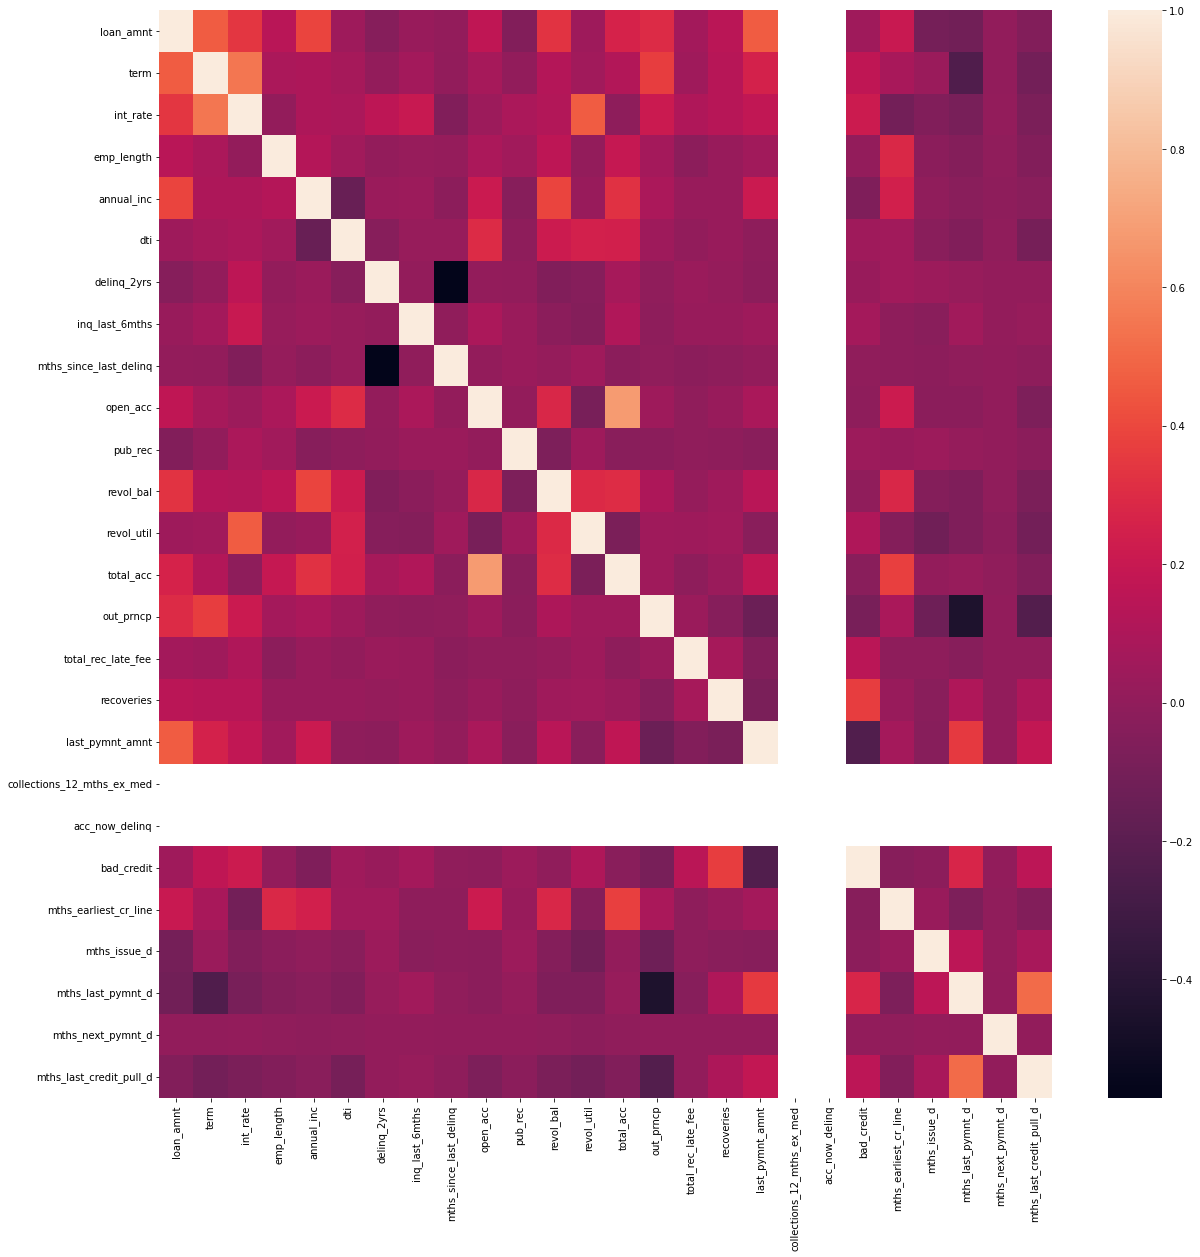

In [120]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [121]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [122]:
to_drop_hicorr

[]

In [123]:
df.drop(to_drop_hicorr, axis=1, inplace=True)

## Feature Selection

In [124]:
categorical = df.select_dtypes(include='object').nunique()
categorical

grade                   7
home_ownership          5
verification_status     3
purpose                13
addr_state             45
initial_list_status     1
dtype: int64

In [127]:
numerical = df.select_dtypes(exclude='object').nunique()
numerical

loan_amnt                       801
term                              3
int_rate                        129
emp_length                       12
annual_inc                     2772
dti                            2820
delinq_2yrs                      11
inq_last_6mths                   10
mths_since_last_delinq           89
open_acc                         36
pub_rec                           5
revol_bal                     13218
revol_util                     1052
total_acc                        69
out_prncp                      1784
total_rec_late_fee              660
recoveries                     2109
last_pymnt_amnt               16461
collections_12_mths_ex_med        1
acc_now_delinq                    1
bad_credit                        2
mths_earliest_cr_line           465
mths_issue_d                     11
mths_last_pymnt_d                59
mths_next_pymnt_d                 3
mths_last_credit_pull_d          59
dtype: int64

In [129]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

B    30.546430
A    26.264783
C    18.451599
D    12.992773
E     7.807709
F     3.109943
G     0.826763
Name: grade, dtype: float64


MORTGAGE    47.043364
RENT        45.417214
OWN          7.528471
OTHER        0.005475
MORTAGE      0.005475
Name: home_ownership, dtype: float64


Verified           36.081910
Not Verified       32.364214
Source Verified    31.553876
Name: verification_status, dtype: float64


debt_consolidation    49.003504
credit_card           12.866842
other                  9.072492
home_improvement       8.075996
major_purchase         4.790845
small_business         4.413053
car                    4.024310
wedding                2.266754
medical                1.735655
moving                 1.472843
vacation               1.051248
house                  0.952694
renewable_energy       0.273763
Name: purpose, dtype: float64


CA    17.663163
NY     9.132720
FL     7.490145
TX     6.860491
NJ     4.528033
IL     3.964082
PA     3.591765
VA     3.361805
GA     3.

# Scalling and Transformation

## One Hot Encoding

In [130]:
categorical = [col for col in df.select_dtypes(include='object').columns.tolist()]

In [131]:
onehot = pd.get_dummies(df[categorical], drop_first=True)

In [132]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Standarization

In [133]:
numerical = [col for col in df.columns.tolist() if col not in categorical + ['bad_credit']]

In [134]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical]), columns=numerical)

In [135]:
std.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,mths_earliest_cr_line,mths_issue_d,mths_last_pymnt_d,mths_next_pymnt_d,mths_last_credit_pull_d
0,-0.862888,-0.732491,-0.408307,1.336839,-0.966125,2.048300,-0.294347,0.172046,5.660456e-16,-1.471332,...,-0.173872,-0.155286,-0.585188,0.0,0.0,1.778091,-1.445493,-0.844076,5.861397e-14,-0.880108
1,-1.161676,1.365279,0.699008,-1.539972,-0.839133,-1.919689,-0.294347,4.070399,5.660456e-16,-1.471332,...,-0.173872,0.003407,-0.595337,0.0,0.0,-0.279729,-1.445493,0.650128,5.861397e-14,1.083819
2,-1.173627,-0.732491,0.864386,1.336839,-1.214776,-0.770238,-0.294347,1.146634,5.660456e-16,-1.700881,...,-0.173872,-0.155286,-0.491771,0.0,0.0,-0.652784,-1.445493,-0.346008,5.861397e-14,-0.880108
3,-0.265312,-0.732491,0.272380,1.336839,-0.432757,0.909271,-0.294347,0.172046,-1.589537e-01,0.135507,...,2.734604,-0.155286,-0.548887,0.0,0.0,0.177564,-1.445493,-0.844076,5.861397e-14,-0.038425
4,-1.101918,1.365279,0.080637,-1.252290,0.219138,0.602552,-0.294347,-0.802542,8.003785e-02,1.283249,...,-0.173872,-0.155286,-0.605468,0.0,0.0,0.189599,-1.445493,-1.697907,-1.519586e+00,-0.880108


##Data Transformation

In [136]:
df_model = pd.concat([onehot, std, df[['bad_credit']]], axis=1)

#Train Test Split

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X = df_model.drop('bad_credit', axis=1)
y = df_model['bad_credit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
X_train.shape, X_test.shape

((14611, 93), (3653, 93))

# Modeling

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy.stats import kstest
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

## Evaluation

In [141]:
def evaluation(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)
    
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
  

    list_model = [('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                 ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:][:,1]
        
        df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
        df_actual_predicted.index = y_test.index
        
        df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
        df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
        df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
        df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
        df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
        df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        f_score = f1_score(y_test, y_pred)
        fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
        auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
        kolsmir = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])/10
        
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['f1_score'].append(f_score)
        result['AUC'].append(auc)
        result['KS'].append(kolsmir)
        result['duration'].append(duration)
        
    return result

In [142]:
result = evaluation(X_train,X_test,y_train,y_test)
result = pd.DataFrame(result)

In [144]:
result

,model_name,model,accuracy,recall,precision,f1_score,AUC,KS,duration
0,Logistic Regression,LogisticRegression(),0.961949,0.821990,0.927165,0.871415,0.986004,0.589801,0.337529
1,Decision Tree,DecisionTreeClassifier(),0.984944,0.940663,0.962500,0.951456,0.966922,0.589801,0.236987
2,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.979743,0.879581,0.990177,0.931608,0.997085,0.589801,1.956746


## Feature Importance

In [145]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [146]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
84,recoveries,0.394420
85,last_pymnt_amnt,0.202221
90,mths_last_pymnt_d,0.129003
92,mths_last_credit_pull_d,0.061345
69,term,0.044232
...,...,...
87,acc_now_delinq,0.000000
56,addr_state_RI,0.000000
58,addr_state_SD,0.000000
63,addr_state_VT,0.000000
